# README
This notebook is used to plot the error distribution of Pretrained Battery Transformer (PBT).

In [11]:
import os
import sys
import numpy as np
folder_a_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(folder_a_path)
from utils.tools import domain_average
import torch
import json
import matplotlib.pyplot as plt
from data_provider.data_split_recorder import split_recorder

In [12]:
def set_ax_linewidth(ax, bw=1.5):
    ax.spines['bottom'].set_linewidth(bw)
    ax.spines['left'].set_linewidth(bw)
    ax.spines['top'].set_linewidth(bw)
    ax.spines['right'].set_linewidth(bw)

def set_ax_font_size(ax, fontsize=10):
    ax.tick_params(axis='y',
                 labelsize=fontsize # y轴字体大小设置
                  ) 
    ax.tick_params(axis='x',
                 labelsize=fontsize # x轴字体大小设置
                  ) 

def set_draft(the_plt, other_ax=''):
    ax = the_plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.xlabel('')
    plt.ylabel('')
    if other_ax:
        other_ax.axes.xaxis.set_ticklabels([])
        other_ax.axes.yaxis.set_ticklabels([])
        other_ax.set_ylabel('')
        other_ax.set_xlabel('')

def set_draft_fig(fig):
    for ax in fig.axes:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        ax.set_ylabel('')
        ax.set_xlabel('')

In [13]:
seed_42_res_path = '../results/PBNet_MIX_large_42.json'
seed_2021_res_path = '../results/PBNet_MIX_large_2021.json'
seed_2024_res_path = '../results/PBNet_MIX_large_2024.json'

seed_42_res = json.load(open(seed_42_res_path))
seed_2021_res = json.load(open(seed_2021_res_path))
seed_2024_res = json.load(open(seed_2024_res_path))

unique_ids_42, res_42 = domain_average(torch.tensor(seed_42_res['MIX_large']['domain_ids']), torch.tensor(seed_42_res['MIX_large']['mapes']), True)
unique_ids_2021, res_2021 = domain_average(torch.tensor(seed_2021_res['MIX_large']['domain_ids']), torch.tensor(seed_2021_res['MIX_large']['mapes']), True)
unique_ids_2024, res_2024 = domain_average(torch.tensor(seed_2024_res['MIX_large']['domain_ids']), torch.tensor(seed_2024_res['MIX_large']['mapes']), True)

In [14]:
id_mapes = {}
for id in unique_ids_42:
    id_mapes[id] = np.mean([res_42[unique_ids_42==id][0], res_2021[unique_ids_2021==id][0], res_2024[unique_ids_2024==id][0]])

print(id_mapes)

{1.0: 0.10362625, 52.0: 0.15141384, 53.0: 0.07455104, 72.0: 0.042433042, 74.0: 0.037063032, 75.0: 0.0674666, 81.0: 0.06663453, 82.0: 0.028753864, 86.0: 0.039934233, 87.0: 0.16627395, 89.0: 0.11874195, 105.0: 0.045197558, 108.0: 0.057710778, 111.0: 0.05185148, 113.0: 0.18209447, 116.0: 0.09651795, 121.0: 0.037382968, 122.0: 0.10036052, 123.0: 0.037281696, 125.0: 0.032233436, 127.0: 0.3175056, 128.0: 0.10224768, 130.0: 0.05663444, 131.0: 0.13483416, 133.0: 0.043589693, 134.0: 0.047434047, 135.0: 0.14838481, 136.0: 0.09507612, 141.0: 0.06467811, 145.0: 0.066381685, 151.0: 0.43665084, 153.0: 0.042794544, 199.0: 0.18697333, 201.0: 0.20408775, 227.0: 0.15474395, 255.0: 0.2951334, 261.0: 0.36942086, 263.0: 0.07120627, 264.0: 0.06126662, 269.0: 0.31343782, 271.0: 0.03481054, 272.0: 0.2266119, 274.0: 0.061552376, 275.0: 0.25990763, 276.0: 0.22191335, 282.0: 0.101337485, 283.0: 0.061104912, 284.0: 0.07565984, 285.0: 0.029212132, 286.0: 0.08202238, 299.0: 0.015642067, 300.0: 0.10858569, 301.0: 0.

In [17]:
%matplotlib inline

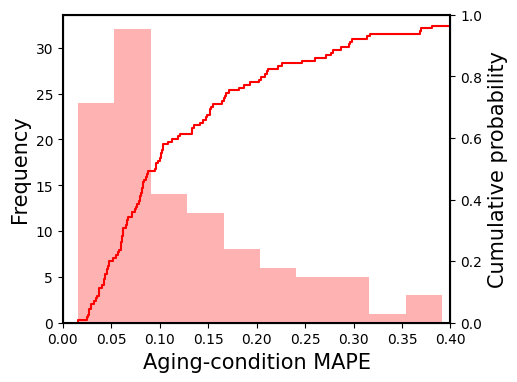

In [42]:
plt_mapes = list(id_mapes.values())
# plt_mapes = [i for i in plt_mapes if i <=0.4]
fig = plt.figure(figsize=(5, 4))
plt.hist(plt_mapes, bins=40, color='red', alpha=0.3)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Aging-condition MAPE', fontsize=15)
ax = plt.gca().twinx()
ax.ecdf(plt_mapes, color='red')
set_ax_linewidth(plt.gca())
ax.set_ylabel('Cumulative probability', fontsize=15)
plt.xlim(0,0.4)
plt.show()